In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
#Load the data.
satisfaction_data = pd.read_csv(r"C:\Users\wyman\Downloads\BLI_29052020182431306.csv")
GDP_data = pd.read_csv(r"C:\Users\wyman\Downloads\WEO_Data.xls",thousands = ',', delimiter = '\t',encoding='latin1')

In [3]:
#Establish columns of interest from datasets.
life_satisfaction = satisfaction_data[satisfaction_data['Indicator'] == 'Life satisfaction']
gdp_per_capita = GDP_data[['Country','2015']]


In [4]:
#Join data together by Country.
total_data = pd.merge(gdp_per_capita,
                      life_satisfaction[['Country','Value']],
                      on = 'Country')


In [5]:
#We get 4 values for countries so need to groupby.
total_data = total_data.groupby('Country').mean().rename(columns={'2015':'GDP', 'Value': 'Satisfaction'})


Text(0, 0.5, 'Life Satisfaction')

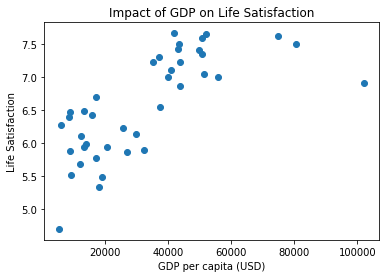

In [6]:
#Visualize the data. 
plt.scatter(total_data['GDP'], total_data['Satisfaction'])
plt.title('Impact of GDP on Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')


In [7]:
#Create a linear regression model.
model = sklearn.linear_model.LinearRegression()


In [8]:
#Prepare data. 
X = np.array(total_data['GDP']).reshape(-1,1)
y = np.array(total_data['Satisfaction'])

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

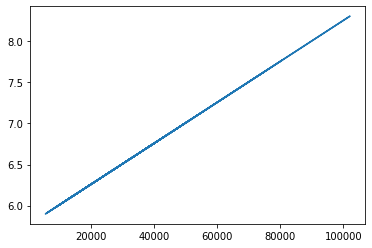

In [9]:
#Predict life satisfaction and visualize the regression line. 
predictions = model.predict(X)
plt.plot(total_data['GDP'], predictions)

In [10]:
#K-neighbors model. 
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

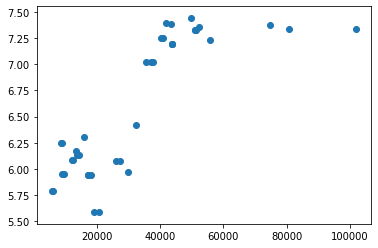

In [11]:
#Fit the data. 
model.fit(X,y)
predictions = model.predict(X)
plt.scatter(total_data['GDP'], predictions)

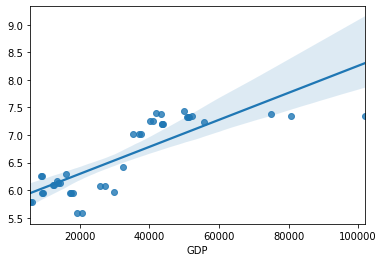

In [13]:
#Regression plot using seaborn to give visualization of regression vs. data points. 
import seaborn as sns
sns.regplot(total_data['GDP'],predictions)

In [15]:
#Let's predict life satisfaction of a new value.
X_new = [[65000]]
print(model.predict(X_new))

[7.42333333]
